In [1]:
#importing libraries
import numpy as np
import pandas as pd
import io
import os
from google.colab import files

In [2]:

file = files.upload()
df1 = pd.read_csv('googleplaystore.csv')

Saving googleplaystore.csv to googleplaystore.csv


In [3]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df1.shape

(10841, 13)

In [5]:
#remvoing unwanted columns from the dataset

def drop_columns(df1):
  dropcolumns = df1.drop(columns=['Last Updated', 'Current Ver', 'Android Ver'] )

  return dropcolumns

#Calling the function

df1_droppedcolumns = drop_columns(df1)

print('New Dataframe', df1_droppedcolumns)

df1_droppedcolumns.head()


New Dataframe                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10838                             Parkinson Exercices FR              MEDICAL   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [6]:
df2 = df1_droppedcolumns

In [7]:
#Checking null values
def check_null_values(df2):
  null_values = df2.isnull().sum()

  if null_values.any():
    print ("Null values ")
  else:
    print ("No null values")

#returning the results containg null value
  return null_values

#Function to get the count of null values

null_Values_count = check_null_values(df2)

Null values 


In [8]:
#checking which columns have null values
df2.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
dtype: int64

In [9]:
#drop null values

def drop_null(df2):
  df_drop_NA = df2.dropna()
  return df_drop_NA

#Calling the function

dropped_NA = drop_null(df2)
print("New Dataframe",dropped_NA )

New Dataframe                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating

In [10]:
df2 = dropped_NA

df2.shape

(9366, 10)

In [11]:
#checking if all the null values are dropped
df2.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

In [12]:
df2.head()

df2.shape

(9366, 10)

In [13]:
#checking for duplicates

def check_duplicates(df2):
#check for duplicates

  duplicates = df2.duplicated()

#count the number of duplicates

  duplicates_count = duplicates.sum()

#printing if there are any duplicates in the data

  if duplicates_count > 0:
    print("There are duplicates")
  else:
    print ("No duplicates")

  return duplicates_count

duplicates_count = check_duplicates(df2)
print("Total duploicates:", duplicates_count)

There are duplicates
Total duploicates: 476


In [14]:
#dropping the duplicate values

def drop_duplicates(df2):

  duplicates = df2.drop_duplicates()
  return duplicates

#calling the function

df4 = drop_duplicates(df2)
print('Duplicates', df4)

Duplicates                                                      App             Category  \
0         Photo Editor & Candy Camera & Grid & ScrapBook       ART_AND_DESIGN   
1                                    Coloring book moana       ART_AND_DESIGN   
2      U Launcher Lite – FREE Live Cool Themes, Hide ...       ART_AND_DESIGN   
3                                  Sketch - Draw & Paint       ART_AND_DESIGN   
4                  Pixel Draw - Number Art Coloring Book       ART_AND_DESIGN   
...                                                  ...                  ...   
10834                                      FR Calculator               FAMILY   
10836                                   Sya9a Maroc - FR               FAMILY   
10837                   Fr. Mike Schmitz Audio Teachings               FAMILY   
10839                      The SCP Foundation DB fr nn5n  BOOKS_AND_REFERENCE   
10840      iHoroscope - 2018 Daily Horoscope & Astrology            LIFESTYLE   

       Rating Re

In [15]:
df4.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [123]:
df4.shape

(8890, 10)

In [16]:
#finding the unique categories from the column

df4.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [77]:
df4.shape

(8890, 10)

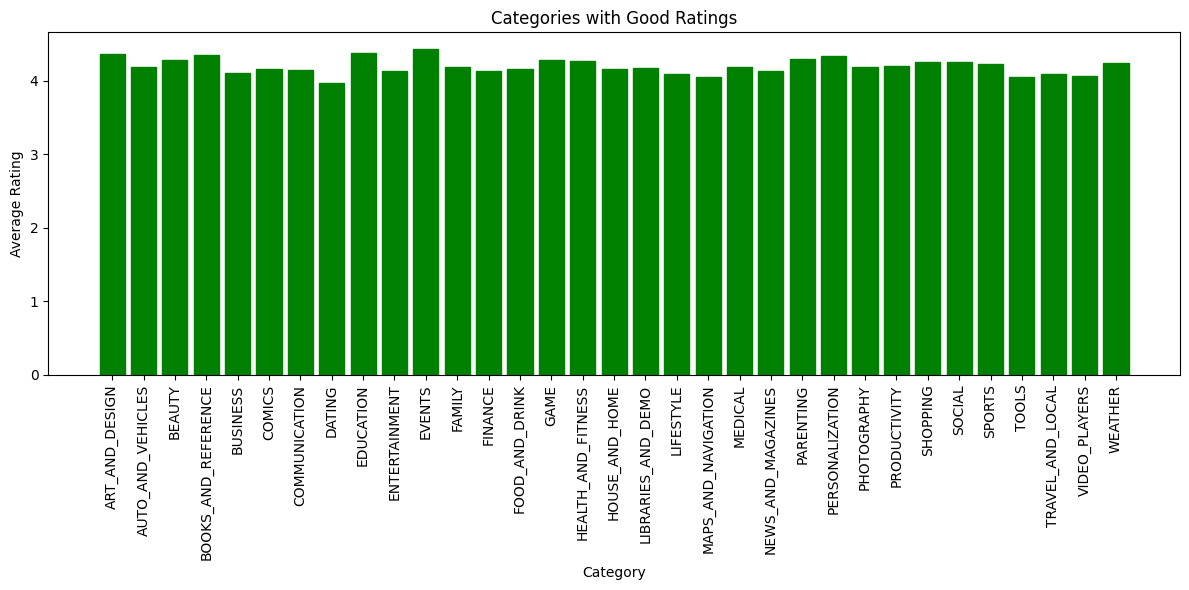

In [140]:
import matplotlib.pyplot as plt

#finding apps that have a rating above 4.0
good_rating_threshold = 1.0

# Group the data by category and calculate the average rating in each category
average_ratings_by_category = df4.groupby('Category')['Rating'].mean()

# Filter the categories with average ratings above the threshold
good_categories = average_ratings_by_category[average_ratings_by_category > good_rating_threshold].index

# Create a bar graph to visualize categories with good ratings
plt.figure(figsize=(12, 6))
bars = plt.bar(average_ratings_by_category.index, average_ratings_by_category.values, color='skyblue')

# Color the bars of categories with good ratings differently
for i, bar in enumerate(bars):
    if average_ratings_by_category.index[i] in good_categories:
        bar.set_color('green')

plt.xlabel('Category')
plt.ylabel('Average Rating')
plt.title('Categories with Good Ratings')
plt.xticks(rotation=90)
plt.tight_layout()

# Show the bar graph
plt.show()


In [17]:
#removing apps with irrelvant name that start with '?'

df5 = df4[~df4['App'].str.startswith('?')]

df5.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity


In [36]:
from google.colab import files
df5.to_csv('CleanedAnalysis.csv')
files.download('CleanedAnalysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
#uploading the rewies dataset

file = files.upload()
df1 = pd.read_csv('googleplaystore_user_reviews.csv')

Saving googleplaystore_user_reviews.csv to googleplaystore_user_reviews.csv


In [127]:
df1.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [22]:
#checking for null values null values from the data

df1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [24]:
df1.isnull().sum()

App                           0
Translated_Review         26868
Sentiment                 26863
Sentiment_Polarity        26863
Sentiment_Subjectivity    26863
dtype: int64

In [27]:
#dropping nAn values

rows_with_nan = df1[df1.isna().any(axis=1)]

print(rows_with_nan)

                               App Translated_Review Sentiment  \
2            10 Best Foods for You               NaN       NaN   
7            10 Best Foods for You               NaN       NaN   
15           10 Best Foods for You               NaN       NaN   
102          10 Best Foods for You               NaN       NaN   
107          10 Best Foods for You               NaN       NaN   
...                            ...               ...       ...   
64290  Houzz Interior Design Ideas               NaN       NaN   
64291  Houzz Interior Design Ideas               NaN       NaN   
64292  Houzz Interior Design Ideas               NaN       NaN   
64293  Houzz Interior Design Ideas               NaN       NaN   
64294  Houzz Interior Design Ideas               NaN       NaN   

       Sentiment_Polarity  Sentiment_Subjectivity  
2                     NaN                     NaN  
7                     NaN                     NaN  
15                    NaN                     NaN  

In [30]:
df_cleaned = df1.dropna()

print (df_cleaned)

                                  App  \
0               10 Best Foods for You   
1               10 Best Foods for You   
3               10 Best Foods for You   
4               10 Best Foods for You   
5               10 Best Foods for You   
...                               ...   
64222  Housing-Real Estate & Property   
64223  Housing-Real Estate & Property   
64226  Housing-Real Estate & Property   
64227  Housing-Real Estate & Property   
64230  Housing-Real Estate & Property   

                                       Translated_Review Sentiment  \
0      I like eat delicious food. That's I'm cooking ...  Positive   
1        This help eating healthy exercise regular basis  Positive   
3             Works great especially going grocery store  Positive   
4                                           Best idea us  Positive   
5                                               Best way  Positive   
...                                                  ...       ...   
64222  Most ads o

In [31]:
#Removed null values

df_cleaned.isnull().sum()

App                       0
Translated_Review         0
Sentiment                 0
Sentiment_Polarity        0
Sentiment_Subjectivity    0
dtype: int64

In [33]:
df2 =  df_cleaned

df3 = df2.drop(columns=['Sentiment_Polarity','Sentiment_Subjectivity'])

df3.head()

,App,Translated_Review,Sentiment
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive
3,10 Best Foods for You,Works great especially going grocery store,Positive
4,10 Best Foods for You,Best idea us,Positive
5,10 Best Foods for You,Best way,Positive


In [35]:
from google.colab import files
df3.to_csv('Cleaned_Analysis.csv')
files.download('Cleaned_Analysis.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>